<a href="https://colab.research.google.com/github/Pritam-Mondal18/task-2-EDA-/blob/main/task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 2 – Exploratory Data Analysis (EDA) on Titanic Dataset

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [106]:
df = pd.read_csv("Titanic-Dataset.csv")

# Generate summary statistics (mean, median, std, etc.)

In [107]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [108]:
# Summary statistics for numeric features
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [109]:
# Calculate median separately
df.median(numeric_only=True)

,0
PassengerId,446.0000
Survived,0.0000
Pclass,3.0000
Age,28.0000
SibSp,0.0000
Parch,0.0000
Fare,14.4542


In [110]:
# Standard deviation
df.std(numeric_only=True)

,0
PassengerId,257.353842
Survived,0.486592
Pclass,0.836071
Age,14.526497
SibSp,1.102743
Parch,0.806057
Fare,49.693429


In [111]:
# Check missing values
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Create histograms and boxplots for numeric features

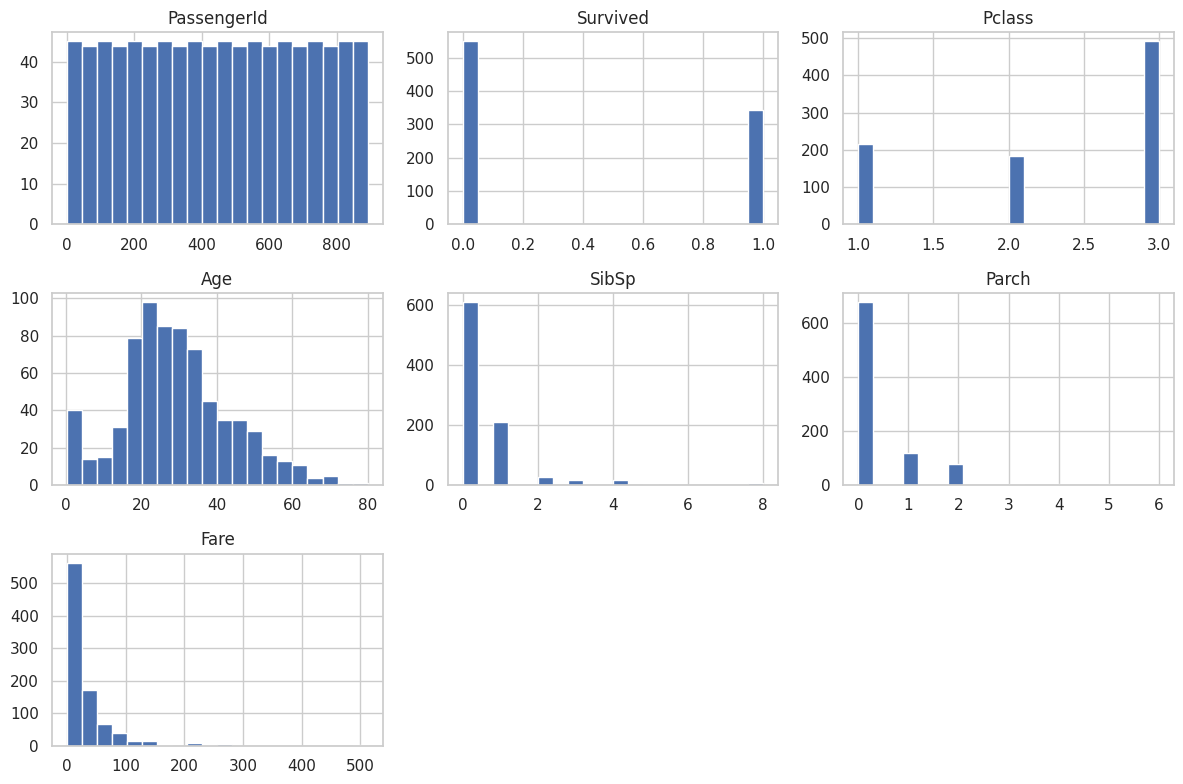

In [112]:
# Histograms
df.hist(bins=20, figsize=(12,8))
plt.tight_layout()
plt.show()


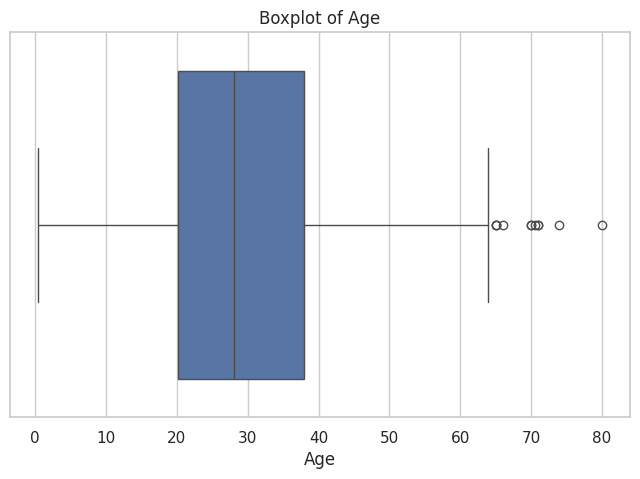

In [113]:
# Boxplot for Age
sns.boxplot(x=df["Age"])
plt.title("Boxplot of Age")
plt.show()


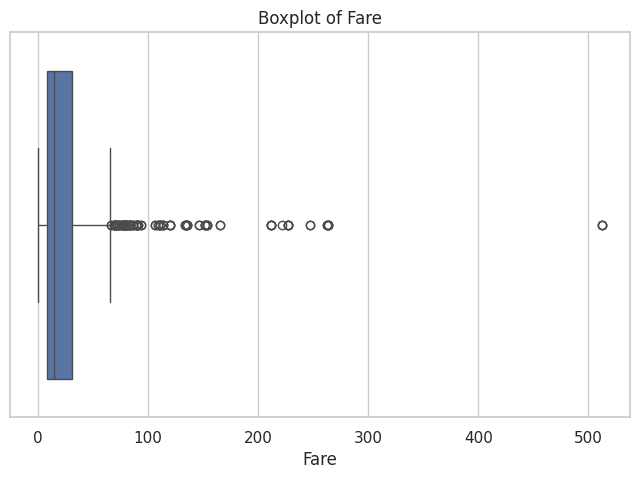

In [114]:
# Boxplot for Fare
sns.boxplot(x=df["Fare"])
plt.title("Boxplot of Fare")
plt.show()


# Use pairplot/correlation matrix for feature relationships.

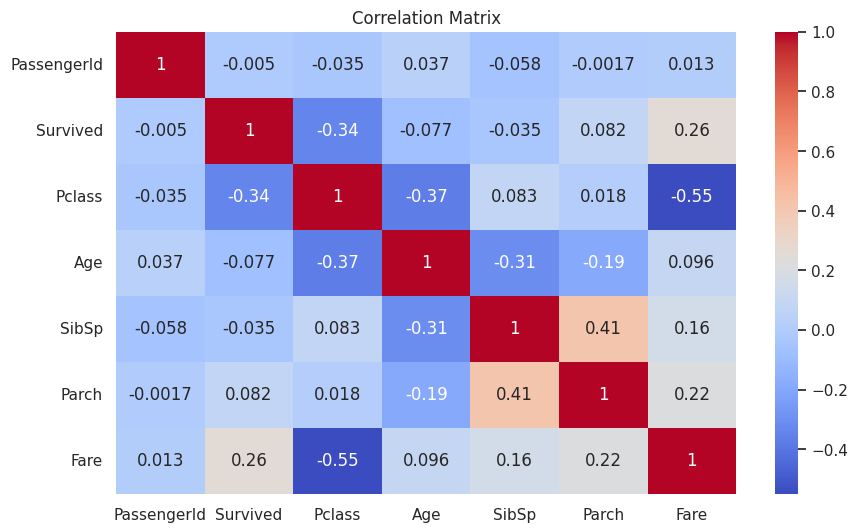

In [115]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


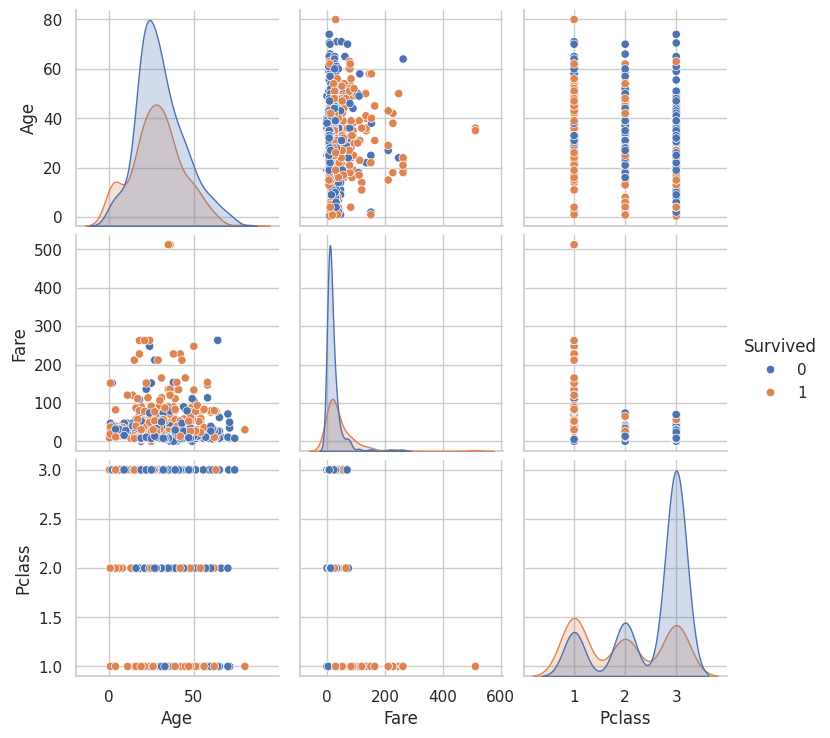

In [116]:
# pairplot
sns.pairplot(df[["Survived","Age","Fare","Pclass"]], hue="Survived")
plt.show()

# Identify patterns, trends, or anomalies in the data.

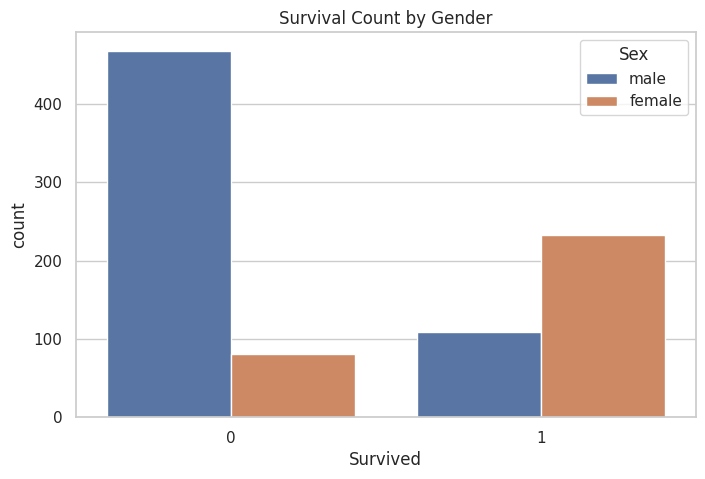

In [117]:
# Survival by Gender
sns.countplot(x="Survived", hue="Sex", data=df)
plt.title("Survival Count by Gender")
plt.show()

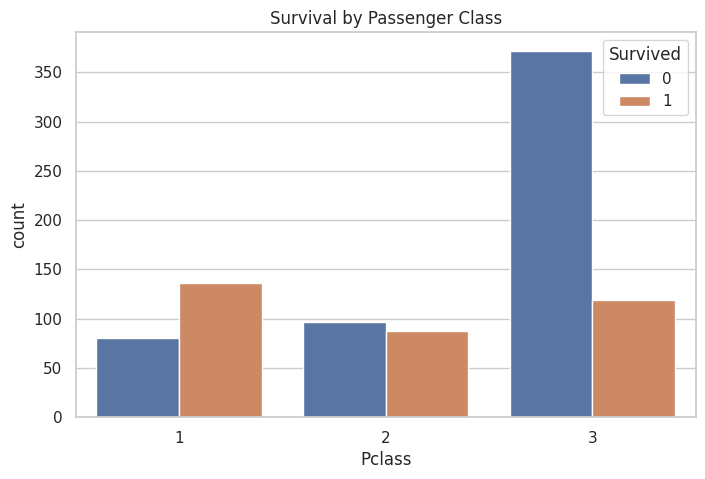

In [118]:
# Survival by Passenger Class
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.show()


In [119]:
# Detect Skewness
df.skew(numeric_only=True)


,0
PassengerId,0.000000
Survived,0.478523
Pclass,-0.630548
Age,0.389108
SibSp,3.695352
Parch,2.749117
Fare,4.787317


In [120]:
# Outlier Detection using Z-Score (for Fare)
from scipy.stats import zscore

z_scores = np.abs(zscore(df["Fare"]))
outliers = df[z_scores > 3]
outliers


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


# Make basic feature-level inferences from visuals.

In [121]:
print("Feature-Level Inferences:")
print("1. Females have higher survival rate than males.")
print("2. 1st class passengers survived more than 3rd class.")
print("3. Fare distribution is highly right-skewed.")
print("4. Age has moderate variation with some missing values.")
print("5. Fare contains extreme outliers.")


Feature-Level Inferences:
1. Females have higher survival rate than males.
2. 1st class passengers survived more than 3rd class.
3. Fare distribution is highly right-skewed.
4. Age has moderate variation with some missing values.
5. Fare contains extreme outliers.
